# Explore here

In [1]:
# Your code here

import os
import pandas as pd
import requests

# 1. descargar data

url = "https://raw.githubusercontent.com/Rafa-Carrasco/arbol-de-regresion/main/data/processed/clean_diabetes_test.csv"
url2 = "https://raw.githubusercontent.com/Rafa-Carrasco/arbol-de-regresion/main/data/processed/clean_diabetes_train.csv"

respuesta = requests.get(url)
nombre_archivo = "clean_diabetes_test.csv"
with open(nombre_archivo, 'wb') as archivo:
    archivo.write(respuesta.content)

respuesta = requests.get(url2)
nombre_archivo = "clean_diabetes_train.csv"
with open(nombre_archivo, 'wb') as archivo:
    archivo.write(respuesta.content)

# 2. convertir csv en dataframe

X_tra = pd.read_csv("../data/processed/clean_diabetes_train.csv")
X_tes = pd.read_csv("../data/processed/clean_diabetes_test.csv")


# Separar las características y la variable objetivo para el conjunto de entrenamiento
X_train = X_tra.drop(columns='Outcome')
y_train = X_tra['Outcome']

# Separar las características y la variable objetivo para el conjunto de prueba
X_test = X_tes.drop(columns='Outcome')
y_test = X_tes['Outcome']






In [2]:
# 3. iniciar y entrenar el modelo CLASIFICACION

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

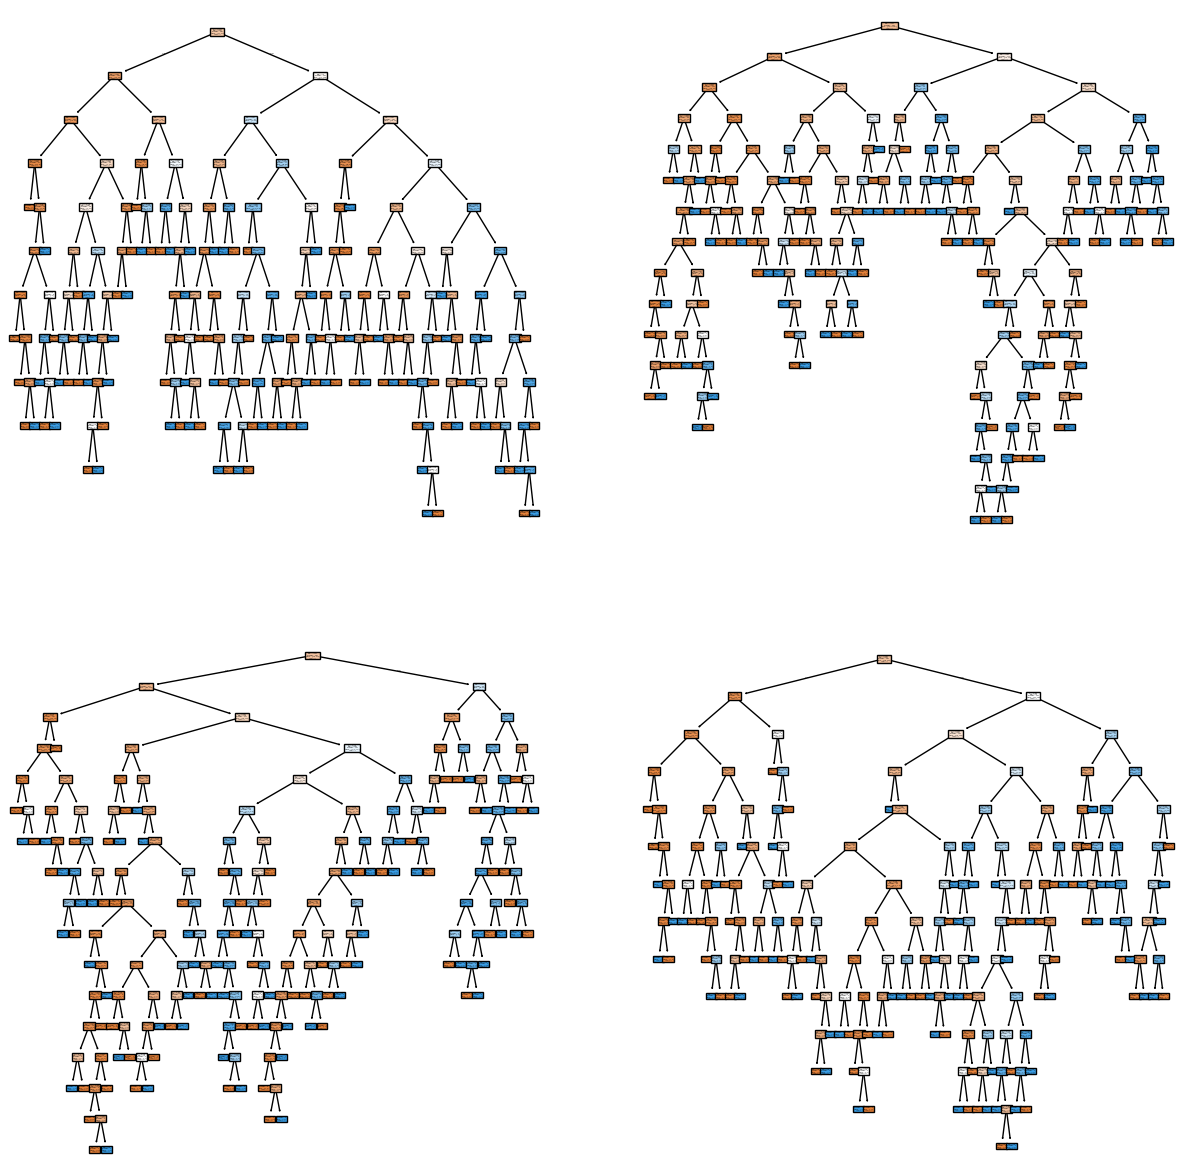

In [3]:
import matplotlib.pyplot as plt
from sklearn import tree

fig, axis = plt.subplots(2, 2, figsize = (15, 15))

# We show the first 4 trees out of the 100 generated (default)
tree.plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [4]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [5]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7207792207792207

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# optimizacion RF classifier
rfc = RandomForestClassifier(
        n_estimators=28, 
        max_depth=10, 
        min_samples_split=2,
        min_samples_leaf=20,
        max_features=10,
        random_state=42
    )

rfc.fit(X_train, y_train)
    
# Hacer predicciones en el conjunto de prueba
y_pred = rfc.predict(X_test)
    
# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

from pickle import dump
dump(model, open("RandomForestClassifier_tweaked_42.sav", "wb"))

Accuracy: 0.7922077922077922
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84        99
           1       0.73      0.67      0.70        55

    accuracy                           0.79       154
   macro avg       0.78      0.77      0.77       154
weighted avg       0.79      0.79      0.79       154



In [7]:
# regression random forest

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state = 42)
model.fit(X_train, y_train) 

RandomForestRegressor(random_state=42)

In [8]:
y_pred = model.predict(X_test)
y_pred

array([0.5 , 0.33, 0.06, 0.09, 0.43, 0.63, 0.05, 0.84, 0.55, 0.7 , 0.26,
       0.89, 0.34, 0.6 , 0.02, 0.41, 0.03, 0.01, 0.58, 0.62, 0.33, 0.03,
       0.2 , 0.02, 0.56, 0.97, 0.01, 0.01, 0.1 , 0.07, 0.68, 0.84, 0.84,
       0.85, 0.6 , 0.61, 0.92, 0.6 , 0.2 , 0.77, 0.06, 0.39, 0.73, 0.49,
       0.03, 0.73, 0.41, 0.1 , 0.02, 0.94, 0.  , 0.86, 0.66, 0.2 , 0.13,
       0.09, 0.55, 0.02, 0.34, 0.77, 0.65, 0.15, 0.24, 0.43, 0.01, 0.74,
       0.01, 0.54, 0.02, 0.69, 0.65, 0.12, 0.03, 0.  , 0.09, 0.4 , 0.07,
       0.06, 0.06, 0.16, 0.7 , 0.11, 0.12, 0.66, 0.34, 0.94, 0.58, 0.51,
       0.4 , 0.04, 0.04, 0.1 , 0.02, 0.55, 0.39, 0.69, 0.72, 0.05, 0.76,
       0.04, 0.86, 0.01, 0.48, 0.68, 0.88, 0.12, 0.23, 1.  , 0.26, 0.83,
       0.01, 0.81, 0.2 , 0.83, 0.3 , 0.42, 0.83, 0.36, 0.03, 0.68, 0.  ,
       0.34, 0.44, 0.03, 0.23, 0.53, 0.3 , 0.75, 0.72, 0.72, 0.67, 0.6 ,
       0.06, 0.42, 0.92, 0.42, 0.31, 0.68, 0.84, 0.  , 0.04, 0.  , 0.17,
       0.48, 0.12, 0.19, 0.19, 0.01, 0.45, 0.77, 0.

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"MSE: {mse}")
print(f"MAE: {mae}")



MSE: 0.1717512987012987
MAE: 0.31733766233766236


In [10]:
# optimizar random forest regression
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(
        n_estimators=100, 
        max_depth=50, 
        min_samples_split=18, 
        min_samples_leaf=3, 
        max_features='log2', 
        random_state=62
    )

rfr.fit(X_train, y_train)
    
# Hacer predicciones en el conjunto de prueba
y_pred = rfr.predict(X_test)
    
# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"MSE: {mse}")
print(f"MAE: {mae}")

MSE: 0.15857953838639466
MAE: 0.3180576214671041


In [11]:
from pickle import dump
dump(model, open("RandomForestRegressor_tweaked_62.sav", "wb"))